$$ ITI \space AI-Pro: \space Intake \space 45 $$
$$ Machine \space Learning \space 1 $$
$$ Lab \space no. \space 2 $$

# `01` Import Necessary Libraries

## `i` Default Libraries

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

## `ii` Additional Libraries
Add imports for additional libraries you used throughout the notebook

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


----------------------------

# `02` Load Data

In [3]:
# def load_housing_data():
#     tarball_path = Path("datasets/housing.tgz")
#     if not tarball_path.is_file():
#         Path("datasets").mkdir(parents=True, exist_ok=True)
#         url = "https://github.com/ageron/data/raw/main/housing.tgz"
#         urllib.request.urlretrieve(url, tarball_path)
#         with tarfile.open(tarball_path) as housing_tarball:
#             housing_tarball.extractall(path="datasets")
#     return pd.read_csv(Path("datasets/housing/housing.csv"))

# housing = load_housing_data()

In [4]:
housing=pd.read_csv(r"C:\Users\dell\Desktop\ITI_2024\Machine_Learning_1\Assigments\Housing\datasets\Housing.csv")

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### there is data about housing to predict Price or Median of Price in California based on some feature :
longitude and latitude: Geographical coordinates of the district.

housing_median_age: Median age of houses in the district.

total_rooms: Total number of rooms in the district.

total_bedrooms: Total number of bedrooms in the district.

population: Total population of the district.

households: Total number of households in the district.


median_income: Median income of residents in the district.

median_house_value: Median house price in the district (target variable).

ocean_proximity: A categorical feature indicating the district's proximity to the ocean.

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


##### there are  null values in total bedrooms
##### 10 Culumns , (9)floats,(1)object
##### 2064 records


In [7]:
housing.shape

(20640, 10)

In [8]:
housing.size

206400

## `#` Create Test Set

Before exploring the data, let's split the data into training and test sets. You shouldn't touch the test set from this point furthur except for final model evaluation.

Use:
- `random_state` $= 1234$
- `test_size` $= 0.2$

Hint: You can use `sklearn.model_selection.train_test_split` function

In [9]:
X=housing.drop("median_house_value", axis=1)
y=housing["median_house_value"]

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1234)

----------------

# `03` Exploratory Data Analysis (EDA)

## `i` Simple Analysis

Preview data, perform statistical data analysis and explore as much as needed to better understand the data set we're dealing with.

`Note:` Feel free to look up EDA approaches online for inspiration (however you **must understand** everything and not copy paste).

In [11]:
housing.describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99]).T.style.background_gradient(cmap='viridis')

,count,mean,std,min,1%,25%,50%,75%,99%,max
longitude,20640.000000,-119.569704,2.003532,-124.350000,-123.220000,-121.800000,-118.490000,-118.010000,-116.290000,-114.310000
latitude,20640.000000,35.631861,2.135952,32.540000,32.680000,33.930000,34.260000,37.710000,40.626100,41.950000
housing_median_age,20640.000000,28.639486,12.585558,1.000000,4.000000,18.000000,29.000000,37.000000,52.000000,52.000000
total_rooms,20640.000000,2635.763081,2181.615252,2.000000,164.000000,1447.750000,2127.000000,3148.000000,11212.110000,39320.000000
total_bedrooms,20433.000000,537.870553,421.385070,1.000000,36.000000,296.000000,435.000000,647.000000,2221.360000,6445.000000
population,20640.000000,1425.476744,1132.462122,3.000000,88.000000,787.000000,1166.000000,1725.000000,5805.830000,35682.000000
households,20640.000000,499.539680,382.329753,1.000000,31.000000,280.000000,409.000000,605.000000,1982.660000,6082.000000
median_income,20640.000000,3.870671,1.899822,0.499900,1.069631,2.563400,3.534800,4.743250,10.596540,15.000100
median_house_value,20640.000000,206855.816909,115395.615874,14999.000000,50000.000000,119600.000000,179700.000000,264725.000000,500001.000000,500001.000000


##### std>>total_rooms>>very big>>variance is high
##### total_rooms,population,households,total_bedrooms>>there is outlier because there is gap between 99% and max value
##### values of median_house_value is high maybe need scaling

In [12]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

## `ii` Visual Analysis

Plot graphs and relations in order to gain more insights about the data set, identify patterns, and make assumptions.

`Note:` Feel free to look up visual EDA approaches online for inspiration (however you **must understand** everything and not copy paste).

#### UNI

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

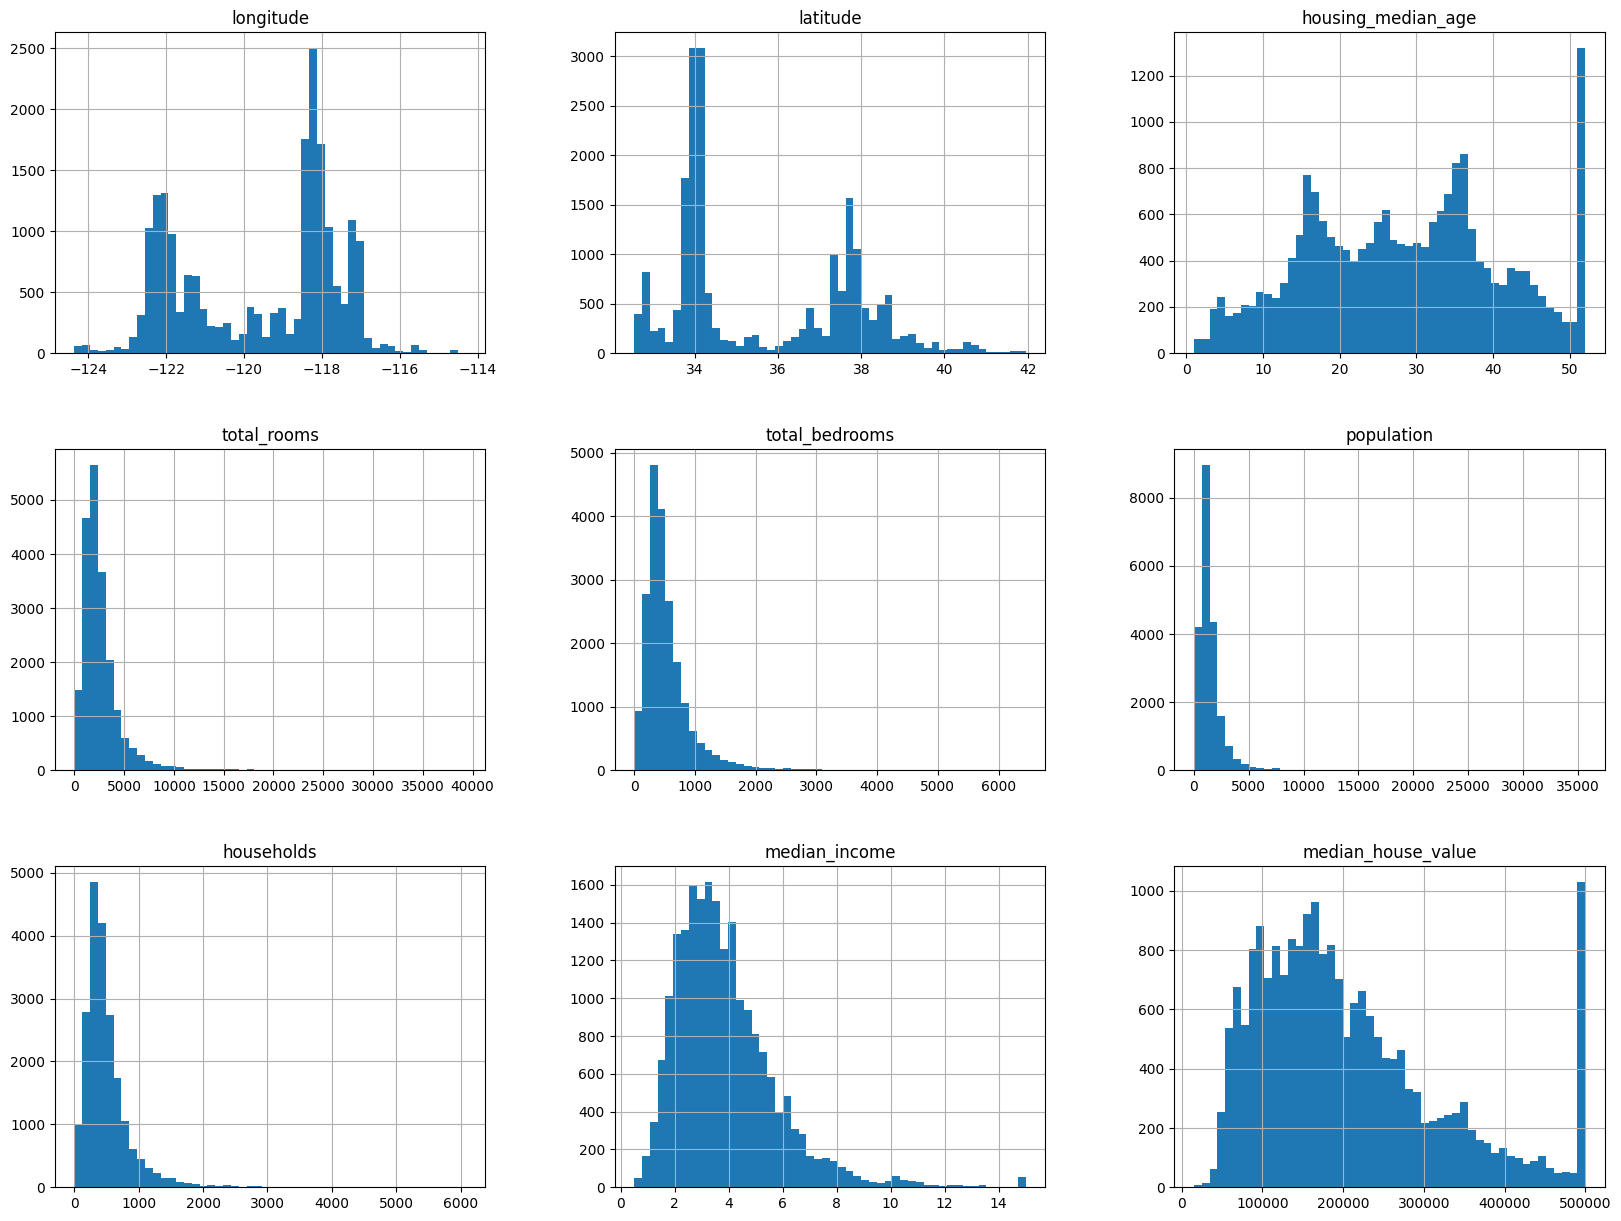

In [13]:
housing.hist(bins=50, figsize=(20,15))

there are feature right skewed like  total_rooms,population,households,total_bedrooms

there are clear outlier in median_house_value

In [14]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

C:\Users\dell\AppData\Local\Temp\ipykernel_20244\3637369399.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='ocean_proximity', data=housing, palette='Set2')


<Axes: xlabel='ocean_proximity', ylabel='count'>

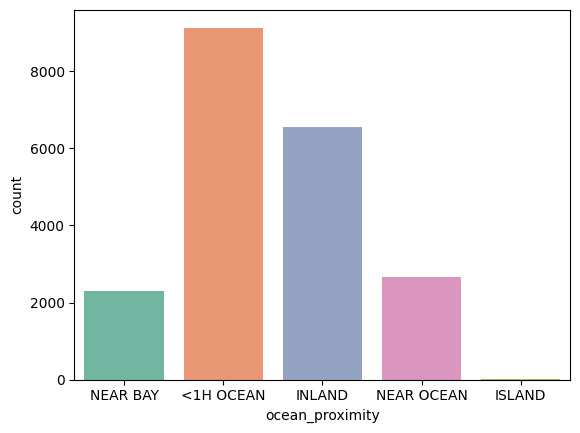

In [15]:
sns.countplot(x='ocean_proximity', data=housing, palette='Set2')

<Axes: ylabel='median_house_value'>

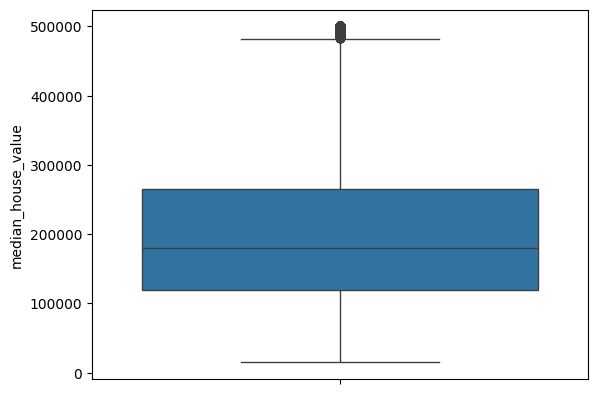

In [16]:
sns.boxplot(housing["median_house_value"])

<Axes: xlabel='population', ylabel='median_house_value'>

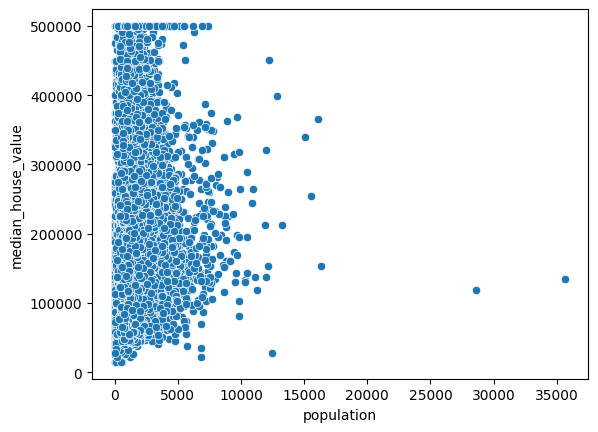

In [17]:
sns.scatterplot(x=housing["population"], y=housing["median_house_value"])

C:\Users\dell\AppData\Local\Temp\ipykernel_20244\2483477156.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=housing["ocean_proximity"], y=housing["median_house_value"], palette='Set2')


<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

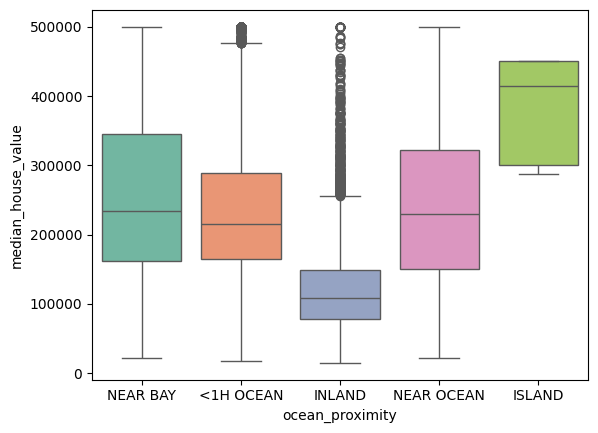

In [18]:
sns.boxplot(x=housing["ocean_proximity"], y=housing["median_house_value"], palette='Set2')


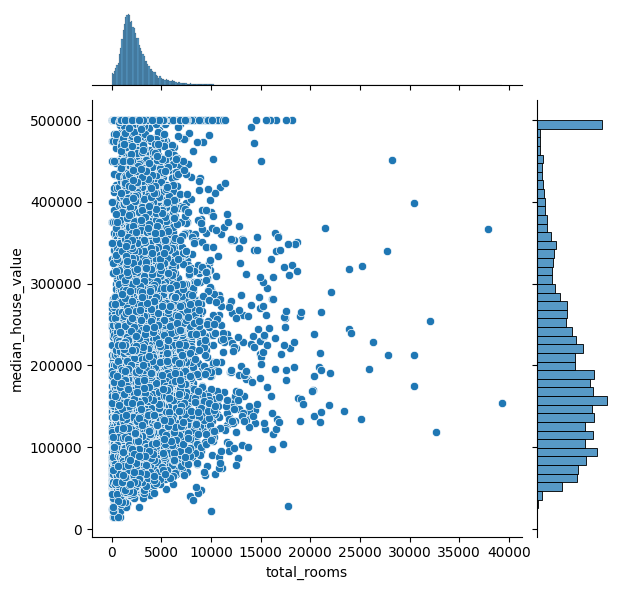

In [19]:
sns.jointplot(data=housing, x="total_rooms", y="median_house_value", kind="scatter")
plt.show()


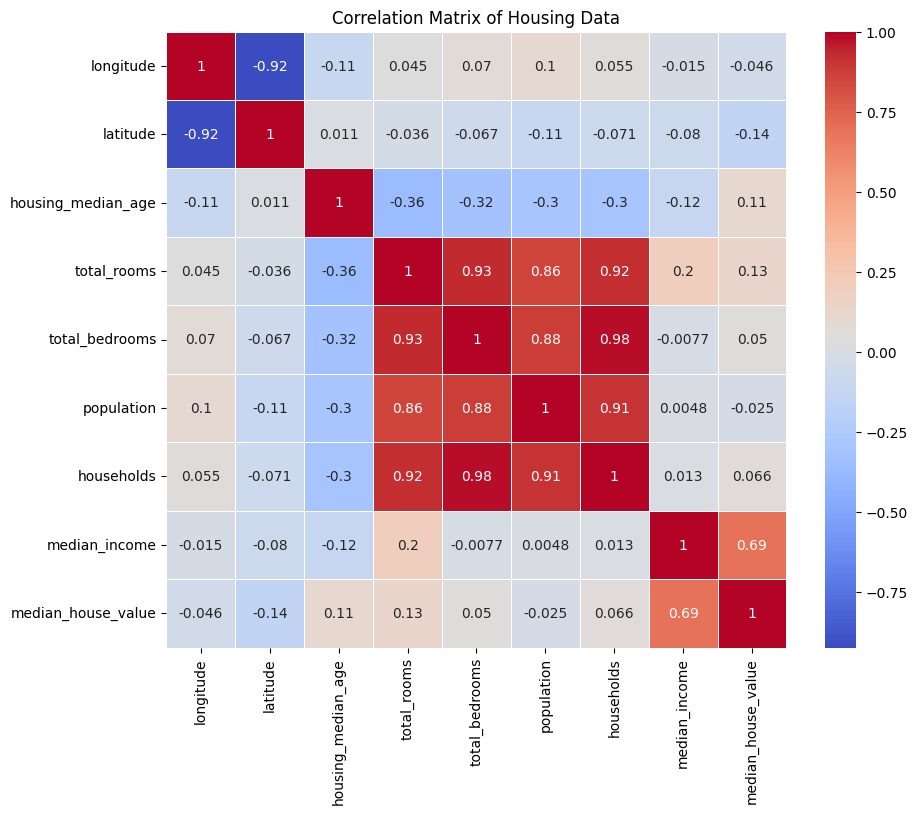

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(housing.select_dtypes(include=["number"]).corr(), annot=True,cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Housing Data")
plt.show()

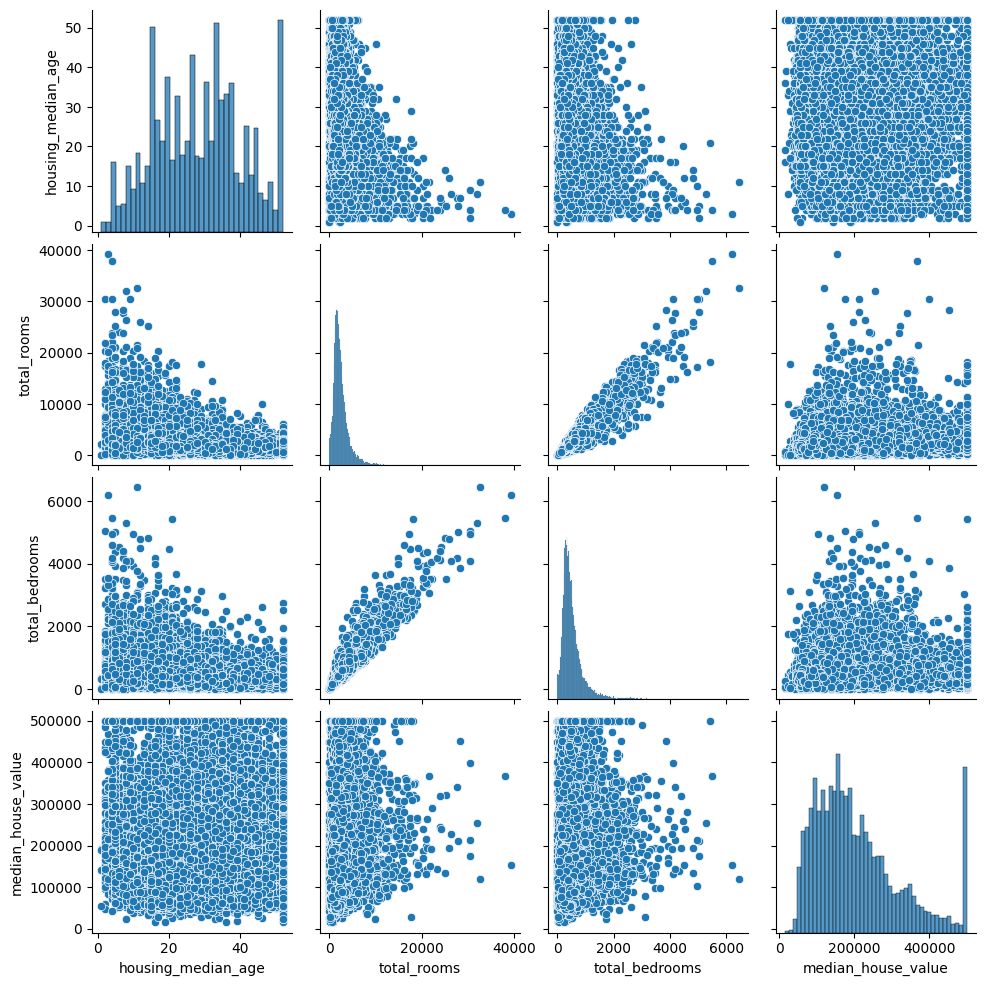

In [21]:

sns.pairplot(housing[["housing_median_age", "total_rooms", "total_bedrooms", "median_house_value"]])
plt.show()


#### Report for data using dataprep

In [22]:
# import datataprep 

In [23]:
# from dataprep.eda import create_report
# report = create_report(housing, title='Housing Data Report')
# report

----------------

# `04` Data Preparation

Perform data cleaning, feature engineering, scaling, etc. as needed to make sure it's ready for the model.

Hint: It could be helpful to check `sklearn.preprocessing` module.

### checking NULL Value

In [24]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [25]:
housing["total_bedrooms"].agg(["mean", "median", "std", "min", "max"])

mean       537.870553
median     435.000000
std        421.385070
min          1.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

<Axes: ylabel='total_bedrooms'>

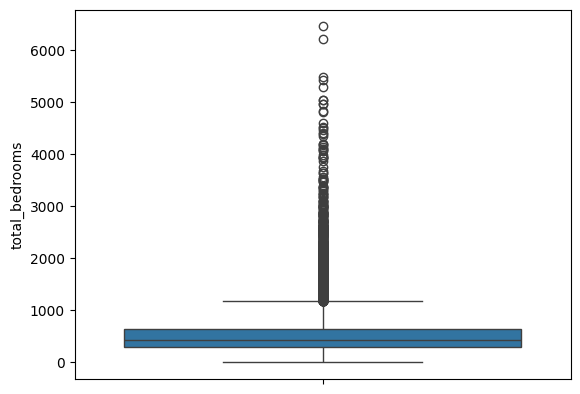

In [26]:
sns.boxplot(housing["total_bedrooms"])

### check outlier

In [27]:
number_of_outliers=[None]*len(housing.select_dtypes(include=["number"]).columns)
q75=[None]*len(housing.select_dtypes(include=["number"]).columns)
q25=[None]*len(housing.select_dtypes(include=["number"]).columns)
IQR=[None]*len(housing.select_dtypes(include=["number"]).columns)


for i, p in enumerate(housing.select_dtypes(include=["number"]).columns):
    q75[i], q25[i]= np.percentile(housing[p],[95,5])
    IQR[i]= q75[i]- q25[i]
    number_of_outliers[i]=len((np.where((housing[p] > (q75[i] + 1.5 * IQR[i])) | (housing[p]< (q25[i] - 1.5 * IQR[i])))[0]))
    
    print('outliers of',p," =", number_of_outliers[i])
    
    print("*"*40)

outliers of longitude  = 0
****************************************
outliers of latitude  = 0
****************************************
outliers of housing_median_age  = 0
****************************************
outliers of total_rooms  = 107
****************************************
outliers of total_bedrooms  = 0
****************************************
outliers of population  = 67
****************************************
outliers of households  = 73
****************************************
outliers of median_income  = 0
****************************************
outliers of median_house_value  = 0
****************************************


### Encoding

In [28]:
label_encoder = LabelEncoder()
x_train["ocean_proximity"] = label_encoder.fit_transform(x_train["ocean_proximity"])
x_val["ocean_proximity"] = label_encoder.transform(x_val["ocean_proximity"])
x_test["ocean_proximity"] = label_encoder.transform(x_test["ocean_proximity"])

### scaling

In [29]:
scaler = RobustScaler()
scaler.fit(x_train)

RobustScaler()

In [30]:
imputer = SimpleImputer(strategy='median')
x_train['total_bedrooms'] = imputer.fit_transform(x_train[['total_bedrooms']])
x_val['total_bedrooms'] = imputer.transform(x_val[['total_bedrooms']])
x_test['total_bedrooms'] = imputer.transform(x_test[['total_bedrooms']])

## `#` Prepare Test Set

Apply the data transformations you used on the training set to the test set.

**Important Note:** DO NOT use `fit` on the test set.

In [31]:
x_train_transformed=scaler.transform(x_train)
x_val_transformed=scaler.transform(x_val)
x_test_transformed=scaler.transform(x_test)


----------------------------

# `05` Normal Equation

Using `sklearn` implementation of the linear regression closed-form solution, i.e. normal equation, to model the data.

Hint: Look for `sklearn.linear_model.LinearRegression` class.

## `i` Model Training

Initializing the model, fitting it to the training data, and get a fitted model.

In [32]:
lin_reg = LinearRegression()
lin_reg.fit(x_train_transformed, y_train)

LinearRegression()

In [33]:
lin_reg.score(x_train_transformed, y_train)

0.6427451836369609

In [34]:
y_pred_val = lin_reg.predict(x_val_transformed)

In [35]:
lin_reg.score(x_val_transformed, y_val)

0.6254242187758754

In [37]:
lin_reg.score(x_test_transformed, y_test)

0.6172654162097

In [38]:
y_pred = lin_reg.predict(x_test_transformed)

## `ii` Model Evaluation

Evaluate model performance using several metrics, e.g. **RMSE**, **MAE**, $R^2$. etc.

In [39]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)


In [40]:
metrics_single_row = pd.DataFrame({
    'R²': [r2],
    'MSE': [mse],
    'RMSE': [rmse],
    'MAE': [mae]
}).round(4)

styled_df = metrics_single_row.T.style.background_gradient(cmap='viridis')
styled_df

,0
R²,0.617300
MSE,5014938685.196700
RMSE,70816.231800
MAE,51304.912200


----------------------

# `06` Linear Regression with Gradient Descent

Using `sklearn` implementation of linear regression to model the data.

Hint: Look for `sklearn.linear_model.SGDRegressor` class.

## `i` Baseline Model Training

Initializing the model with initial parameters, fitting it to the training data, and get a baseline model.

Use:
- Non-regularized model.
- Constant `learning_rate`

In [71]:
SGD_reg = SGDRegressor(penalty=None,learning_rate="constant",eta0=0.0002,max_iter=100)

In [72]:
SGD_reg.fit(x_train_transformed, y_train)

SGDRegressor(eta0=0.0002, learning_rate='constant', max_iter=100, penalty=None)

In [73]:
SGD_reg.n_iter_

65

In [79]:
SGD_reg.t_

858586.0

In [74]:
SGD_reg.score(x_train_transformed,y_train)

0.6422571353705845

In [75]:
SGD_reg.score(x_val_transformed,y_val)

0.6248929108826596

In [76]:
y_pred_val=SGD_reg.predict(x_train_transformed)

In [77]:
SGD_reg.score(x_test_transformed,y_test)

0.6175268701878303

In [78]:
y_pred=SGD_reg.predict(x_test_transformed)

## `ii` Model Evaluation

Evaluate the baseline model performance using several metrics, e.g. **RMSE**, **MAE**, $R^2$. etc.

In [68]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)


In [69]:
metrics_single_row = pd.DataFrame({
    'R²': [r2],
    'MSE': [mse],
    'RMSE': [rmse],
    'MAE': [mae]
}).round(4)

styled_df = metrics_single_row.T.style.background_gradient(cmap='viridis')
styled_df

,0
R²,0.615500
MSE,5038438926.515000
RMSE,70981.962000
MAE,51221.776500


## `iii` Tune `learning_rate`

Try different `learning_rate` values and evaluate. What is the optimal learning rate?

Hint: You might want to use `sklearn.model_selection.RandomizedSearchCV` or `sklearn.model_selection.GridSearchCV` classes.

In [83]:
sgd_cv =SGDRegressor(learning_rate='constant', max_iter=10000)

In [84]:
params = {
    'eta0': [0.0001, 0.001, 0.01, 0.1, 1], 
    'penalty': ['l1', 'l2'], 
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1] 
}

In [87]:
clf = GridSearchCV(sgd_cv, params, cv=3, verbose=3)

In [89]:
clf.fit(x_train_transformed, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV 1/3] END alpha=0.0001, eta0=0.0001, penalty=l1;, score=0.645 total time=   0.0s
[CV 2/3] END alpha=0.0001, eta0=0.0001, penalty=l1;, score=0.627 total time=   0.1s
[CV 3/3] END alpha=0.0001, eta0=0.0001, penalty=l1;, score=0.649 total time=   0.0s
[CV 1/3] END alpha=0.0001, eta0=0.0001, penalty=l2;, score=0.643 total time=   0.0s
[CV 2/3] END alpha=0.0001, eta0=0.0001, penalty=l2;, score=0.627 total time=   0.1s
[CV 3/3] END alpha=0.0001, eta0=0.0001, penalty=l2;, score=0.649 total time=   0.0s
[CV 1/3] END alpha=0.0001, eta0=0.001, penalty=l1;, score=0.647 total time=   0.0s
[CV 2/3] END alpha=0.0001, eta0=0.001, penalty=l1;, score=0.624 total time=   0.0s
[CV 3/3] END alpha=0.0001, eta0=0.001, penalty=l1;, score=0.648 total time=   0.0s
[CV 1/3] END alpha=0.0001, eta0=0.001, penalty=l2;, score=0.646 total time=   0.0s
[CV 2/3] END alpha=0.0001, eta0=0.001, penalty=l2;, score=0.627 total time=   0.0s
[CV 3/3] END alpha=

GridSearchCV(cv=3,
             estimator=SGDRegressor(learning_rate='constant', max_iter=10000),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'eta0': [0.0001, 0.001, 0.01, 0.1, 1],
                         'penalty': ['l1', 'l2']},
             verbose=3)

In [90]:
clf.best_params_

{'alpha': 0.01, 'eta0': 0.001, 'penalty': 'l1'}

In [91]:
clf.best_score_

0.6413682275621277

In [95]:
clf.best_estimator_

SGDRegressor(alpha=0.01, eta0=0.001, learning_rate='constant', max_iter=10000,
             penalty='l1')

In [94]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_eta0,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.154560,0.053746,0.002501,0.002208,0.0001,0.0001,l1,"{'alpha': 0.0001, 'eta0': 0.0001, 'penalty': '...",6.447703e-01,6.265810e-01,6.486784e-01,6.400099e-01,9.628758e-03,5
1,0.112605,0.061518,0.005781,0.001893,0.0001,0.0001,l2,"{'alpha': 0.0001, 'eta0': 0.0001, 'penalty': '...",6.426602e-01,6.265048e-01,6.487996e-01,6.393215e-01,9.403019e-03,10
2,0.016510,0.005576,0.005766,0.004801,0.0001,0.001,l1,"{'alpha': 0.0001, 'eta0': 0.001, 'penalty': 'l1'}",6.469942e-01,6.243999e-01,6.477384e-01,6.397108e-01,1.083074e-02,7
3,0.012614,0.006104,0.006429,0.004983,0.0001,0.001,l2,"{'alpha': 0.0001, 'eta0': 0.001, 'penalty': 'l2'}",6.461550e-01,6.269577e-01,6.478335e-01,6.403154e-01,9.470169e-03,3
4,0.004244,0.004306,0.006371,0.004001,0.0001,0.01,l1,"{'alpha': 0.0001, 'eta0': 0.01, 'penalty': 'l1'}",6.313355e-01,5.858631e-01,6.007487e-01,6.059825e-01,1.892931e-02,20
5,0.012248,0.004567,0.001782,0.000154,0.0001,0.01,l2,"{'alpha': 0.0001, 'eta0': 0.01, 'penalty': 'l2'}",6.354518e-01,6.169125e-01,6.203782e-01,6.242475e-01,8.047991e-03,18
6,0.011853,0.005181,0.006306,0.002736,0.0001,0.1,l1,"{'alpha': 0.0001, 'eta0': 0.1, 'penalty': 'l1'}",-8.892478e+12,-6.057759e+12,-8.644957e+12,-7.865065e+12,1.281947e+12,40
7,0.018335,0.007138,0.003577,0.001137,0.0001,0.1,l2,"{'alpha': 0.0001, 'eta0': 0.1, 'penalty': 'l2'}",-2.993787e+10,-7.509605e+12,-2.539432e+10,-2.521646e+12,3.527020e+12,38
8,0.028425,0.005743,0.005015,0.002823,0.0001,1,l1,"{'alpha': 0.0001, 'eta0': 1, 'penalty': 'l1'}",-1.954167e+15,-1.477579e+15,-1.448309e+16,-5.971613e+15,6.021669e+15,48
9,0.011605,0.003071,0.002059,0.000248,0.0001,1,l2,"{'alpha': 0.0001, 'eta0': 1, 'penalty': 'l2'}",-1.436131e+15,-2.755947e+15,-9.810000e+15,-4.667359e+15,3.676098e+15,47


In [96]:
best_sgd = clf.best_estimator_

In [98]:
best_sgd.score(x_val_transformed, y_val)

0.6246474420739738

## `iv` Regularization Mode: On

Let's try $l_1$ and $l_2$ regularization. Use default parameters for simplicity. Does regularization made the model generalize better?

Which of the two regularizations performs better?

### they seem there are equal they help model not to overfit

In [105]:
las=Lasso(alpha=0.001)
las.fit(x_train_transformed, y_train)
las.score(x_train_transformed, y_train)


0.6427451836369522

In [106]:
las.score(x_val_transformed, y_val)

0.6254242189447932

In [111]:
y_pred_val=las.predict(x_val_transformed)
mean_absolute_error(y_val, y_pred_val)

50760.81674238099

In [108]:
Rid=Ridge(alpha=0.0001)
Rid.fit(x_train_transformed, y_train)
Rid.score(x_train_transformed, y_train)

0.6427451836369494

In [109]:
Rid.score(x_val_transformed, y_val)

0.625424214394381

In [112]:
y_pred_val=Rid.predict(x_val_transformed)
mean_absolute_error(y_val, y_pred_val)

50760.8167375955

------------------

# `07` Generalization Error

Now that we have tuned our solution, to an *extent*, we need to test for a final time on the held out test set.

In [114]:
y_pred=SGD_reg.predict(x_test_transformed)
r2 = r2_score(y_test, y_pred)
r2


0.6175268701878303

-----------------------------

# `Bonus` Better Flow

For the model to be production-ready, we need to integrate it into a pipeline along with the data preparation flow.

Hint: Look up `sklearn.pipeline.Pipeline` class.

In [122]:
pipline=Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
    ('model', SGDRegressor(penalty="l1",learning_rate='constant', max_iter=100,alpha=0.0001, eta0=0.001))
])

In [123]:
pipline.fit(x_train_transformed, y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', RobustScaler()),
                ('model',
                 SGDRegressor(eta0=0.001, learning_rate='constant',
                              max_iter=100, penalty='l1'))])

In [124]:
y_pred_val=pipline.predict(x_val_transformed)

In [125]:
r2_score(y_val,y_pred_val)

0.6246551942456766

----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Abdelrahman \space Eid $$